### **РК2**

# Серов Савелий Сергеевич ИУ5-61Б
# Вариант 12

### **Загрузка данных и импорт необходимых библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [2]:
# Загрузка данных
data = pd.read_csv('dc-wikia-data.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


## Предварительный анализ и отбор целевой переменной
Целевой переменной в данной задаче выберем `SEX` — пол персонажа. Ограничим данные только строками, где явно указан пол (мужской или женский).

In [3]:
# Удалим строки с неопределенным полом
data = data[data['SEX'].isin(['Male Characters', 'Female Characters'])]

### **Выбор признаков**
Выберем признаки, влияющие на пол персонажа (цвет глаз, цвет волос, хорошесть :) )

In [4]:
# Упрощение и отбор признаков
features = ['EYE', 'HAIR', 'ALIGN']
X = data[features]
y = data['SEX']

### **Обработка пропусков**
Пропущенные значения будут заполнены наиболее частыми (модой) для соответствующего признака.

In [5]:
# Обработка пропусков
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

### **Кодирование признаков**

In [6]:
# Кодирование категориальных признаков
X_encoded = pd.get_dummies(X_imputed)

### **Разделение данных на обучающую и тестовую выборки**
Тестовая выборка составит 20% от всего набора. Обучение будет проводиться на 80%.

In [7]:
# Кодирование целевой переменной
y_encoded = LabelEncoder().fit_transform(y)
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

### **Обучение моделей**
Мы обучим две модели:
- Логистическая регрессия
- Градиентный бустинг

In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [9]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

### **Оценка качества моделей**
Оценим модели с использованием метрик:
- **Accuracy** — доля верных предсказаний
- **F1 Score** — гармоническое среднее точности и полноты, особенно важно при дисбалансе классов

In [10]:
print("--- Линейная/логистическая регрессия ---")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("F1 Score:", f1_score(y_test, lr_preds))
cm_lr = confusion_matrix(y_test, lr_preds)

print("\n--- Градиентный бустинг ---")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print("F1 Score:", f1_score(y_test, gb_preds))
cm_gb = confusion_matrix(y_test, gb_preds)

--- Линейная/логистическая регрессия ---
Accuracy: 0.7355555555555555
F1 Score: 0.8382419574082465

--- Градиентный бустинг ---
Accuracy: 0.7296296296296296
F1 Score: 0.8378498445135495


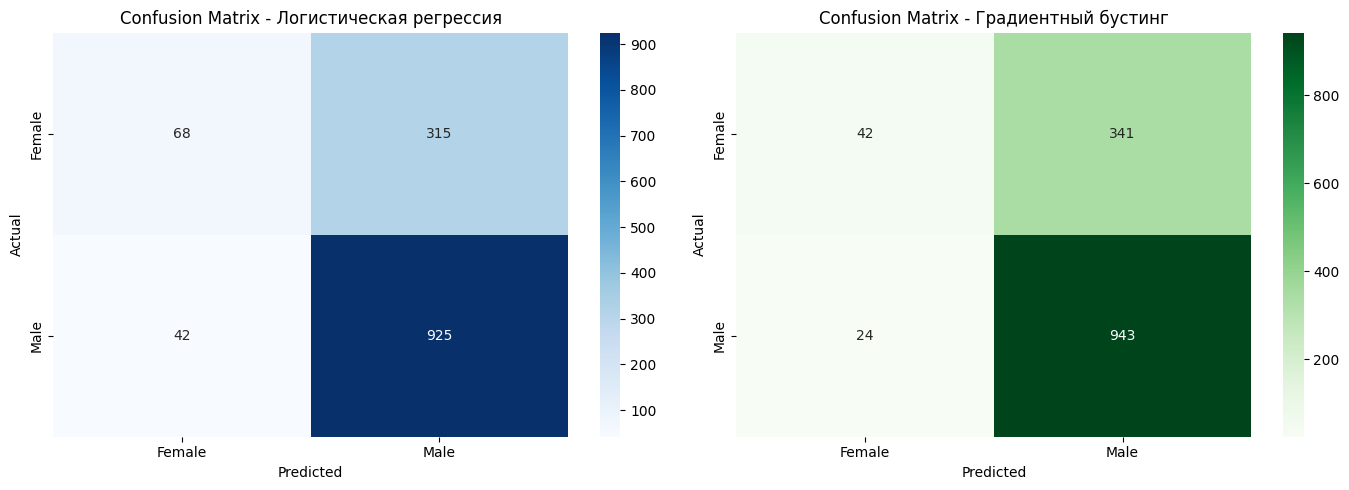

In [11]:
# Визуализация матриц ошибок
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Линейная/логистическая регрессия
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Логистическая регрессия')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_xticklabels(['Female', 'Male'])
axs[0].set_yticklabels(['Female', 'Male'])

# Градиентный бустинг
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Confusion Matrix - Градиентный бустинг')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
axs[1].set_xticklabels(['Female', 'Male'])
axs[1].set_yticklabels(['Female', 'Male'])

plt.tight_layout()
plt.show()

### Вывод:
## - **Линейная/логистическая регрессия** показывает базовое качество классификации, простая в реализации и интерпретации.
## - **Градиентный бустинг** обеспечивает более высокую точность и F1-мегрику, особенно при наличии сложных зависимостей между признаками.
## - В условиях дисбаланса классов (больше мужских персонажей), **F1 Score** остаётся приоритетной метрикой для объективной оценки модели.
